# Project 1 Exploratory Data Analysis
### Serena Shah | ss94574
## Part 1

We first import necessary libraries and and loading the data into a Pandas dataframe.

In [295]:
import pandas as pd
import numpy as np

# read in data
cars = pd.read_csv('data/project1.data')

We now identify the shape and size of the raw data.

In [296]:
# data shape
cars.shape

(398, 9)

In [297]:
# data size
cars.size

3582

Next we look at information about the data types of the data columns.

In [298]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


`horsepower` should be a float object because it is a numerical variable, but its datatype is `object`. This is because there are some `?` missing values in place of numerical values for some rows. This is shown below.

In [299]:
cars[cars["horsepower"].astype(str).str.endswith("?")] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


We'll replace these question mark values with the median value for horsepowers so we don't have to throw away potentially valuable data. First we'll convert them to NaN values, then convert `horsepower` to a float datatype from object. Lastly we'll use a median value to replace the NaN vals.

In [300]:
# substitute '?' with NaN vals
cars.loc[cars['horsepower'] == '?','horsepower'] = np.nan
# convert column to float datatype
cars['horsepower'] = cars['horsepower'].astype(float)
# use median value in place of NaN vals
cars['horsepower'] = cars['horsepower'].fillna(cars['horsepower'].median())

# output horsepower vals with '?'
cars[cars["horsepower"].astype(str).str.endswith("?")] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name


Now when we look at the `cars` dataset we see that `horsepower` is datatype `float64`.

In [301]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


We can now get rid of unnecessary columns. The `origin` column is not going to be useful for our data analysis so we can drop that column.

In [302]:
# drop origin column
cars.drop(['origin'], axis=1, inplace=True)

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


We'll now gather statistical information about the dataset.

In [303]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


It looks `horsepower` has a fairly high standard deviation for its data range, so there are potentially outliers in this column.

We'll visualize the dataset with a univariate plot to further explore. First we need to import the seaborn and matplotlib libraries.

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt

Looking at the minimum and maximum values for `model_year` we know that the dataset has car models from 1970 to 1982. Let's see which model years were most abundant in the dataset.

Text(0.5, 1.0, 'Model Years of Cars')

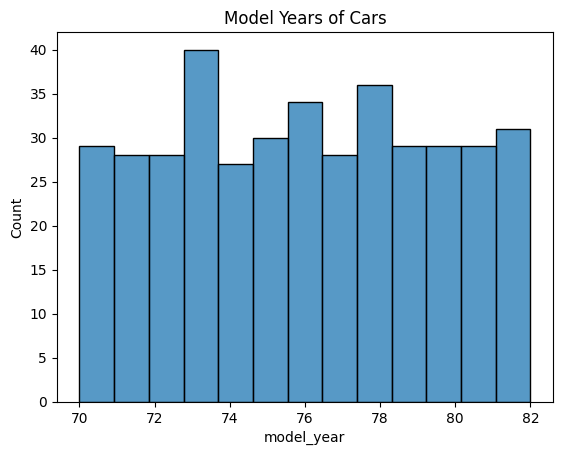

In [305]:
# 13 bins for 13 years
sns.histplot(data=cars['model_year'], bins=13)
plt.title("Model Years of Cars")

There is a pretty normal distribution for model year. 

Now we'll explore the number of cylinders per car in another univariate analysis, count plot. Our statistical summary above shows that this should be between 3 to 8 for any car.

Text(0.5, 1.0, 'Number of Cylinders in Cars')

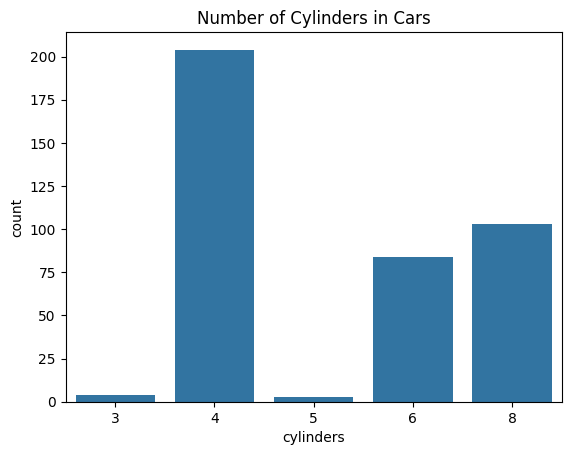

In [306]:
# countplot for cylinder number
sns.countplot(x=cars['cylinders'])
plt.title("Number of Cylinders in Cars")

We'll use a box plot for our final univariate analysis where we'll explore our hypothesis that `horsepower` values seem to have some outliers.

Text(0.5, 1.0, 'Horsepower Distribution')

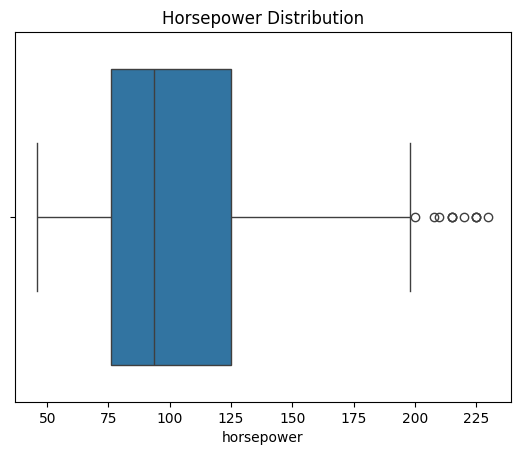

In [307]:
# boxplot univariate analysis
sns.boxplot(data=cars, x='horsepower')
plt.title("Horsepower Distribution")

It looks as though there are some outliers of higher value that lie outside the whisker of the box plot. 75% of the data lies between 75 and 125 hp.

We'll do some bivariate analysis plots to find correlations between different columns/variables.

Text(0.5, 1.0, 'Car Acceleration vs. Horsepower')

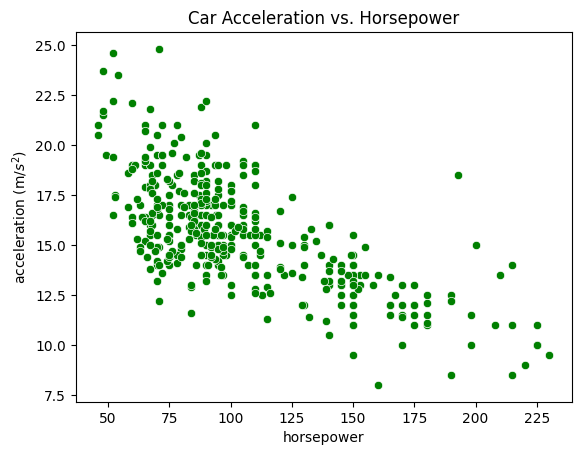

In [308]:
# scatterplot bivariate analysis
sns.scatterplot(data=cars, x='horsepower', y='acceleration', color='green')
plt.ylabel("acceleration (m/$s^2$)")
plt.title("Car Acceleration vs. Horsepower")

We'll now visualize the relationship between model year and number of cylinders with a bivariate histogram plot.

Text(0.5, 1.0, 'Cylinder Number and Model Year Count')

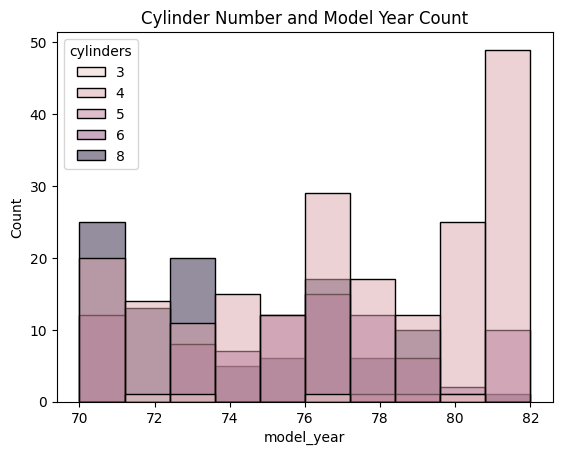

In [309]:
# bivariate histogram plot
sns.histplot(x=cars['model_year'], hue=cars['cylinders'])
plt.title("Cylinder Number and Model Year Count")

It looks like earlier models had more cylinders than the newer models.

To explore how columns are correlated we'll create a heat map that maps their correlations to each other. After, we'll look specifically at the `mpg` rows/columns to understand which variables have the highest correlations with it.

Text(0.5, 1.0, 'Automobile Features Correlation Matrix')

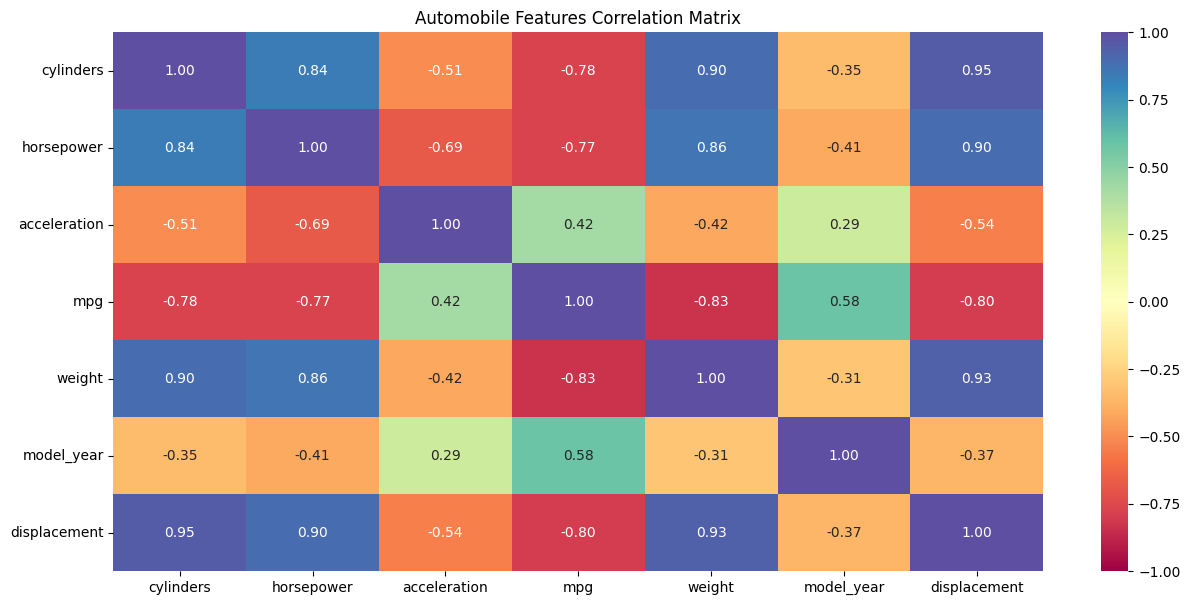

In [310]:
# columns investigate correlation
corr_cols = ['cylinders','horsepower','acceleration', 'mpg','weight','model_year', 'displacement']
plt.figure(figsize=(15, 7))

# creating heat map
sns.heatmap(
   cars[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.title("Automobile Features Correlation Matrix")

It seems that weight, cylinder number, engine displacement, and horsepower all have the largest magnitude correlation with the miles per gallon a car provides. It's interesting to note that they all have negative correlations, though, indicating that for smaller values of those variables there is better mileage/fuel efficiency.

Other highly correlated variable pairs are: 
- displacement and cylinder number
- weight and cylinder number
- weight and displacement
- horsepower and weight.

## Part 2
We'll now import the necessary libraries for fitting regression models on the dataset to predict fuel efficiency of cars.

In [311]:
import sklearn
import sklearn.linear_model
from sklearn.model_selection import train_test_split

# set X (independent) data and y (dependent) variable 
X = cars.drop(['mpg', 'car_name'], axis=1) #  remove non-numeric car_name for linear regression fit
y = cars['mpg']


We'll now split the data into training and testing sets for our model fitting.

In [312]:
# split data into 1:1 ratio for same shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

We'll now fit a linear regression model on the training set.

In [313]:
# linear fit
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Let's allow the linear regression model to predict fuel efficiency from the training data.

In [314]:
lr.predict(X_test)

array([21.98663157, 26.16326399, 19.47542832, 25.7100703 , 24.09984634,
       14.96269197, 28.86918165, 33.58855961, 16.1265836 , 10.66256562,
       31.33294669, 16.43803889, 22.30700926, 26.56899235, 35.53548198,
       22.71740229, 10.07161954, 20.92895521,  8.14932081, 32.56029007,
       25.96848433, 31.12614159, 21.4916773 , 25.27229475, 27.17947452,
       28.76021443, 31.62691239, 31.91604854, 14.90675129, 30.93969774,
       28.07008248, 10.24219649, 20.85993257, 27.84428513, 26.16940563,
       13.59136201, 28.58882719,  8.54570796, 32.33047606, 25.27030257,
       26.38390075, 25.92896541, 20.09418355, 32.35350869, 26.99532522,
       22.24796776, 21.05940949, 11.34264548, 28.13935491, 19.09733297,
       24.51330531, 27.94850424, 15.81180358, 11.56491322, 30.40914015,
       25.29729476,  9.70264884, 12.46308502, 30.20459221, 34.67197021,
       34.80144414, 34.77841327, 17.46889305, 28.24811027, 19.21166688,
       31.94986215, 27.51286595, 26.60348344, 30.78195185, 12.31

We can gain more information about the error between the actual and linear regression predicted values for fuel efficiency (mpg) below.

In [315]:
differences = abs(y_test-lr.predict(X_test))
differences.describe()

count    199.000000
mean       2.658100
std        2.142656
min        0.002847
25%        0.868561
50%        2.486695
75%        3.797177
max       10.795182
Name: mpg, dtype: float64

The average magnitude of difference between the two values is 2.65 mpg, with the smallest error of 0.0028 mpg and the largest error of 10.7952 mpg.

Now, let's check the accuracy of the fits in predicting fuel efficiency for both the training and testing sets.

In [316]:
# testing data lr score
lr.score(X_test, y_test)

0.8152016653526799

In [317]:
# training data lr score
lr.score(X_train, y_train)

0.7999168029450936

The testing accuracy is more relevant for the problem statement which aims to predict fuel efficiency on new data.